In [1]:
import lava

c:\Users\21520\anaconda3\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\21520\PycharmProjects\LAVA\LAVA\otdd\pytorch\utils.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [96]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from preact_resnet import PreActResNet18
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torch.autograd import Variable

import matplotlib.pyplot as plt
from torch import tensor
from torchvision import datasets, transforms
import pandas as pd
import numpy as n

from torch.utils.data import Dataset, TensorDataset, DataLoader

True


In [4]:
#from preact_resnet import PreActResNet18
import torch
print(torch.cuda.is_available())  # Should return True if GPU is available

True


In [5]:
import torch
print(torch.__version__)

2.3.0


In [6]:
cuda_num = 0
import torchvision
print(torchvision.__version__)
import torch
print(torch.__version__)
import os
#os.environ["CUDA_VISIBLE_DEVICES"]=str(cuda_num)
#print(os.environ["CUDA_VISIBLE_DEVICES"])
#torch.cuda.set_device(cuda_num)
print("Cuda device: ", torch.cuda.current_device())
print("cude devices: ", torch.cuda.device_count())

0.18.0
2.3.0
Cuda device:  0
cude devices:  1


In [7]:
device = torch.device('cuda:' + str(cuda_num) if torch.cuda.is_available() else 'cpu')
print(device)
training_size = 1000
valid_size = 200
resize = 32
portion = 0.3

cuda:0


In [8]:
net_test = PreActResNet18()
net_test = net_test.to(device)
feature_extractor_name = 'preact_resnet18_test_mnist.pth'
net_test.load_state_dict(torch.load('checkpoint/'+feature_extractor_name, map_location=torch.device('cpu')))
net_test.eval()

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [9]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='MNIST', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

MNIST
Currrent label: 0
New label: 9 
TRAINNNN label:  tensor(9)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 9)
Currrent label: 1
New label: 8 
TRAINNNN label:  tensor(8)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, 

In [10]:
for batch in loaders['train']:
    print(batch[0].size())

torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([64, 1, 32, 32])
torch.Size([52, 1, 32, 32])


In [10]:
embedder = net_test.to(device)
embedder.fc = torch.nn.Identity()
for p in embedder.parameters():
    p.requires_grad = False
embedder.to(device)

PreActResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (layer1): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
    (1): PreActBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    )
  )
  (layer2): Sequential(
    (0): PreActBlock(
      (bn1): BatchNorm2d

In [11]:
from otdd.pytorch.distance_fast import DatasetDistance, FeatureCost, batch_augmented_cost
from otdd.pytorch.wasserstein import pwdist_exact
from functools import partial
from lava import train_with_corrupt_flag, get_indices

# all lables

In [13]:
feature_cost = FeatureCost(src_embedding = embedder,
                               src_dim = (1, resize,resize),
                               tgt_embedding = embedder,
                               tgt_dim = (1, resize,resize),
                               p = 2,
                               device='cuda')
dist = DatasetDistance(loaders['train'], loaders['test'],
                           inner_ot_method = 'exact',
                           debiased_loss = True,
                           feature_cost = feature_cost,
                           λ_x=1.0, λ_y=1.0,
                           sqrt_method = 'spectral',
                           sqrt_niters=10,
                           precision='single',
                           p = 2, entreg = 1e-1,
                           device='cuda')

In [14]:
dist._load_datasets(device=device)

  0%|          | 0/8 [00:00<?, ?it/s]

load full dataset: torch.Size([500])


  0%|          | 0/2 [00:00<?, ?it/s]

load full dataset: torch.Size([100])


In [15]:
print(dist.X1.shape, dist.X2.shape)
print(dist.Y1.shape, dist.Y2.shape)
print(dist.Y2)

torch.Size([500, 1024]) torch.Size([100, 1024])
torch.Size([500]) torch.Size([100])
tensor([12, 16, 13, 19, 12, 15, 17, 16, 12, 18, 18, 17, 13, 14, 17, 18, 11, 15,
        14, 10, 10, 12, 11, 12, 10, 19, 19, 16, 11, 13, 19, 18, 18, 14, 18, 12,
        11, 10, 12, 17, 11, 11, 18, 15, 11, 15, 18, 10, 11, 16, 17, 12, 16, 12,
        17, 17, 17, 13, 11, 16, 13, 10, 16, 17, 13, 10, 13, 15, 14, 13, 10, 18,
        10, 14, 11, 14, 19, 17, 14, 11, 14, 14, 10, 12, 11, 11, 15, 19, 13, 14,
        10, 17, 18, 17, 10, 17, 17, 18, 13, 13])


In [16]:

W = dist._get_label_distances().to(torch.device(device))

10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
cost function:


  0%|          | 0/45 [00:00<?, ?it/s]

0 1
huhu: torch.Size([49, 1024]) torch.Size([61, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 61 1024
torch.Size([1, 61, 100])
torch.Size([1, 49, 61])
1 61 1024
torch.Size([1, 61, 100])
1 49 1024
torch.Size([1, 49, 100])
torch.Size([1, 61, 49])
was: tensor(1092.2510, device='cuda:0')
0 2
huhu: torch.Size([49, 1024]) torch.Size([41, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 41 1024
torch.Size([1, 41, 100])
torch.Size([1, 49, 41])
1 41 1024
torch.Size([1, 41, 100])
1 49 1024
torch.Size([1, 49, 100])
torch.Size([1, 41, 49])
was: tensor(3822.0188, device='cuda:0')
0 3
huhu: torch.Size([49, 1024]) torch.Size([57, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 57 1024
torch.Size([1, 57, 100])
torch.Size([1, 49, 57])
1 57 1024
torch.Size([1, 57, 100])
1 49 1024
torch.Size([1, 49, 100])
torch.Size([1, 57, 49])
was: tensor(4331.4590, device='cuda:0')
0 4
huhu: torch.Size([49, 1024]) torch.Size([46, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 46 1024
torch.Size([1, 46, 100])
torch.Size([1, 49, 46]

  0%|          | 0/45 [00:00<?, ?it/s]

0 1
huhu: torch.Size([12, 1024]) torch.Size([13, 1024])
1 12 1024
torch.Size([1, 12, 100])
1 13 1024
torch.Size([1, 13, 100])
torch.Size([1, 12, 13])
1 13 1024
torch.Size([1, 13, 100])
1 12 1024
torch.Size([1, 12, 100])
torch.Size([1, 13, 12])
was: tensor(1144.4114, device='cuda:0')
0 2
huhu: torch.Size([12, 1024]) torch.Size([10, 1024])
1 12 1024
torch.Size([1, 12, 100])
1 10 1024
torch.Size([1, 10, 100])
torch.Size([1, 12, 10])
1 10 1024
torch.Size([1, 10, 100])
1 12 1024
torch.Size([1, 12, 100])
torch.Size([1, 10, 12])
was: tensor(7105.4312, device='cuda:0')
0 3
huhu: torch.Size([12, 1024]) torch.Size([11, 1024])
1 12 1024
torch.Size([1, 12, 100])
1 11 1024
torch.Size([1, 11, 100])
torch.Size([1, 12, 11])
1 11 1024
torch.Size([1, 11, 100])
1 12 1024
torch.Size([1, 12, 100])
torch.Size([1, 11, 12])
was: tensor(14184.0566, device='cuda:0')
0 4
huhu: torch.Size([12, 1024]) torch.Size([10, 1024])
1 12 1024
torch.Size([1, 12, 100])
1 10 1024
torch.Size([1, 10, 100])
torch.Size([1, 12, 10

  0%|          | 0/100 [00:00<?, ?it/s]

0 0
huhu: torch.Size([49, 1024]) torch.Size([12, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 12 1024
torch.Size([1, 12, 100])
torch.Size([1, 49, 12])
1 12 1024
torch.Size([1, 12, 100])
1 49 1024
torch.Size([1, 49, 100])
torch.Size([1, 12, 49])
was: tensor(729.4359, device='cuda:0')
0 1
huhu: torch.Size([49, 1024]) torch.Size([13, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 13 1024
torch.Size([1, 13, 100])
torch.Size([1, 49, 13])
1 13 1024
torch.Size([1, 13, 100])
1 49 1024
torch.Size([1, 49, 100])
torch.Size([1, 13, 49])
was: tensor(2120.3982, device='cuda:0')
0 2
huhu: torch.Size([49, 1024]) torch.Size([10, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 10 1024
torch.Size([1, 10, 100])
torch.Size([1, 49, 10])
1 10 1024
torch.Size([1, 10, 100])
1 49 1024
torch.Size([1, 49, 100])
torch.Size([1, 10, 49])
was: tensor(5384.6377, device='cuda:0')
0 3
huhu: torch.Size([49, 1024]) torch.Size([11, 1024])
1 49 1024
torch.Size([1, 49, 100])
1 11 1024
torch.Size([1, 11, 100])
torch.Size([1, 49, 11])

In [17]:
print(W.shape)

torch.Size([20, 20])


In [18]:
import geomloss
import numpy as np

In [19]:
cost_geomloss = partial(
                batch_augmented_cost,
                W=W,
                λ_x=dist.λ_x,
                λ_y=dist.λ_y,
                feature_cost=dist.feature_cost
            )

loss = geomloss.SamplesLoss(
                loss=dist.loss, p=dist.p,
                cost=cost_geomloss,
                debias=dist.debiased_loss,
                blur=dist.entreg**(1 / dist.p),
                backend='tensorized'
            )

In [20]:
maxsamples = None
if maxsamples and dist.X1.shape[0] > maxsamples:
    idxs_1 = sorted(np.random.choice(
    dist.X1.shape[0], maxsamples, replace=False))
else:
    idxs_1 = np.s_[:]  # hack to get a full slice

if maxsamples and dist.X2.shape[0] > maxsamples:
    idxs_2 = sorted(np.random.choice(
    dist.X2.shape[0], maxsamples, replace=False))
else:
    idxs_2 = np.s_[:]  # hack to get a full slice
Z1 = torch.cat((dist.X1[idxs_1],
                dist.Y1[idxs_1].type(dist.X1.dtype).unsqueeze(1)), -1)
Z2 = torch.cat((dist.X2[idxs_2],
                dist.Y2[idxs_2].type(dist.X2.dtype).unsqueeze(1)), -1)
Z1 = Z1.to(device)
Z2 = Z2.to(device)

In [21]:
with torch.no_grad():
    loss.debias = False
    loss.potentials = True
    print(Z1.shape, Z2.shape)
    F_i, G_j = loss(Z1, Z2)

torch.Size([500, 1025]) torch.Size([100, 1025])
Z1 shape in batch:  torch.Size([1, 500, 1025])
Z2 shape in batch:  torch.Size([1, 100, 1025])
1 500 1024
torch.Size([1, 500, 100])
1 100 1024
torch.Size([1, 100, 100])
torch.Size([1, 500, 100])
torch.Size([1, 500, 100])
Gia tri M: tensor([[[152, 156, 153,  ..., 158, 153, 153],
         [132, 136, 133,  ..., 138, 133, 133],
         [ 12,  16,  13,  ...,  18,  13,  13],
         ...,
         [ 72,  76,  73,  ...,  78,  73,  73],
         [112, 116, 113,  ..., 118, 113, 113],
         [192, 196, 193,  ..., 198, 193, 193]]], device='cuda:0')
torch.Size([1, 500, 100])
torch.Size([1, 500, 100])
gia tri D: tensor([[[ 1804.6853, 14974.2344,  7895.7363,  ...,  9058.2617,
          17243.1738, 10226.9785],
         [12706.6680,  2664.0090, 26863.2051,  ...,  6163.3584,
          43521.8320, 27187.5566],
         [12645.3027,  1490.4263, 27969.5547,  ...,  8942.0752,
          45487.8203, 29173.7930],
         ...,
         [ 2939.3594, 28473.1777

In [25]:
π = [F_i, G_j]
dual_sol = π
for i in range(len(dual_sol)):
    dual_sol[i] = dual_sol[i].to('cpu')

In [26]:
train_indices = get_indices(loaders['train'])
trained_with_flag = train_with_corrupt_flag(loaders['train'], shuffle_ind, train_indices)

inspected: 10, found: 7 detection rate: 0.05 baseline: 1.8
inspected: 20, found: 11 detection rate: 0.07 baseline: 3.6
inspected: 30, found: 17 detection rate: 0.11 baseline: 5.4
inspected: 40, found: 22 detection rate: 0.15 baseline: 7.2
inspected: 50, found: 29 detection rate: 0.19 baseline: 9.0
inspected: 60, found: 35 detection rate: 0.23 baseline: 10.8
inspected: 70, found: 43 detection rate: 0.29 baseline: 12.6
inspected: 80, found: 49 detection rate: 0.33 baseline: 14.4
inspected: 90, found: 55 detection rate: 0.37 baseline: 16.2
inspected: 100, found: 58 detection rate: 0.39 baseline: 18.0
inspected: 110, found: 64 detection rate: 0.43 baseline: 19.8
inspected: 120, found: 69 detection rate: 0.46 baseline: 21.6
inspected: 130, found: 71 detection rate: 0.47 baseline: 23.400000000000002
inspected: 140, found: 75 detection rate: 0.50 baseline: 25.2
inspected: 150, found: 81 detection rate: 0.54 baseline: 27.0
inspected: 160, found: 85 detection rate: 0.57 baseline: 28.8
inspected

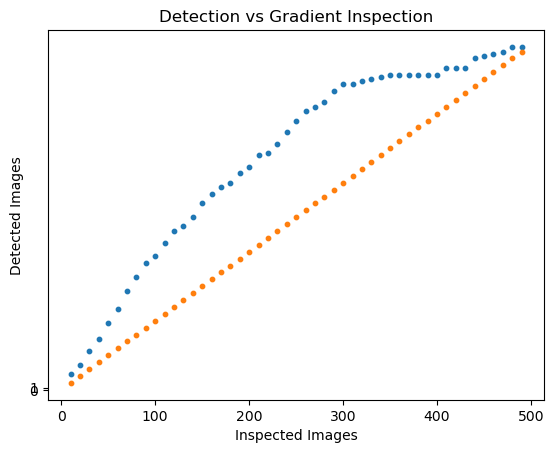

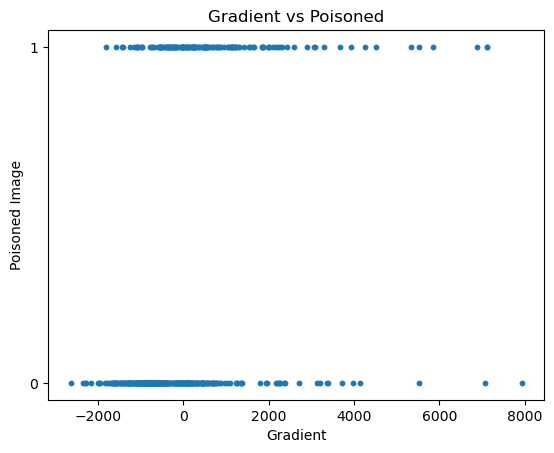

Number of poisoned images:  150  out of 10000.
last index of poison 490


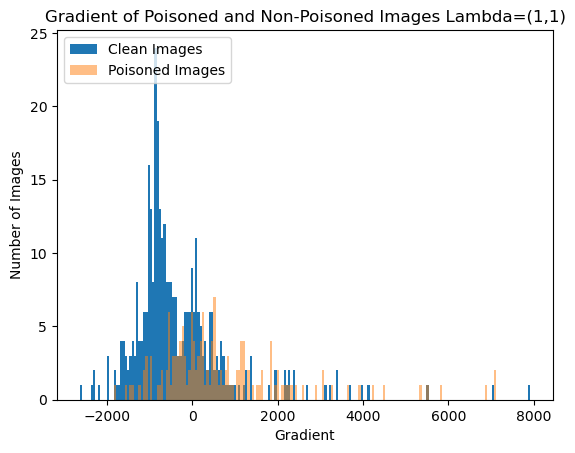

In [27]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

# 0 1 labels, cân bằng

In [65]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='MNIST', resize=resize,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

MNIST
Currrent label: 0
New label: 7 
TRAINNNN label:  tensor(7)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 7)
Currrent label: 1
New label: 3 
TRAINNNN label:  tensor(3)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, 

In [66]:
cnt1 =0
cnt0 =0
for batch in loaders['train']:
    print(batch[0].size())
    print(batch[1].size())
    print(torch.sum(batch[1] == 1).item())
    cnt1+=torch.sum(batch[1] == 1).item()
    print(torch.sum(batch[1] == 0).item())
    cnt0+=torch.sum(batch[1] == 0).item()

torch.Size([64, 1, 32, 32])
torch.Size([64])
30
19
torch.Size([64, 1, 32, 32])
torch.Size([64])
20
24
torch.Size([64, 1, 32, 32])
torch.Size([64])
25
15
torch.Size([64, 1, 32, 32])
torch.Size([64])
22
23
torch.Size([64, 1, 32, 32])
torch.Size([64])
32
19
torch.Size([64, 1, 32, 32])
torch.Size([64])
27
24
torch.Size([64, 1, 32, 32])
torch.Size([64])
23
22
torch.Size([64, 1, 32, 32])
torch.Size([64])
21
20
torch.Size([64, 1, 32, 32])
torch.Size([64])
29
21
torch.Size([64, 1, 32, 32])
torch.Size([64])
21
28
torch.Size([64, 1, 32, 32])
torch.Size([64])
29
20
torch.Size([64, 1, 32, 32])
torch.Size([64])
21
24
torch.Size([64, 1, 32, 32])
torch.Size([64])
22
29
torch.Size([64, 1, 32, 32])
torch.Size([64])
23
24
torch.Size([64, 1, 32, 32])
torch.Size([64])
24
28
torch.Size([40, 1, 32, 32])
torch.Size([40])
16
10


In [68]:
cnt1 =0
cnt0 =0
for batch in loaders['test']:
    print(batch[0].size())
    print(batch[1].size())
    print(torch.sum(batch[1] == 1).item())
    cnt1+=torch.sum(batch[1] == 1).item()
    print(torch.sum(batch[1] == 0).item())
    cnt0+=torch.sum(batch[1] == 0).item()

torch.Size([64, 1, 32, 32])
torch.Size([64])
28
36
torch.Size([64, 1, 32, 32])
torch.Size([64])
39
25
torch.Size([64, 1, 32, 32])
torch.Size([64])
38
26
torch.Size([8, 1, 32, 32])
torch.Size([8])
6
2


In [67]:
print(cnt1, cnt0)

385 350


In [69]:
print(cnt1, cnt0)

111 89


In [70]:
feature_cost = FeatureCost(src_embedding = embedder,
                               src_dim = (1, resize,resize),
                               tgt_embedding = embedder,
                               tgt_dim = (1, resize,resize),
                               p = 2,
                               device='cuda')
dist = DatasetDistance(loaders['train'], loaders['test'],
                           inner_ot_method = 'exact',
                           debiased_loss = True,
                           feature_cost = feature_cost,
                           λ_x=1.0, λ_y=1.0,
                           sqrt_method = 'spectral',
                           sqrt_niters=10,
                           precision='single',
                           p = 2, entreg = 1e-1,
                           device='cuda')

In [71]:
dist._load_datasets(device=device)

  0%|          | 0/16 [00:00<?, ?it/s]

load full dataset: torch.Size([1000])


  0%|          | 0/4 [00:00<?, ?it/s]

load full dataset: torch.Size([200])


In [72]:
print(dist.X1.shape, dist.X2.shape)
print(dist.Y1.shape, dist.Y2.shape)
print(dist.Y2)

torch.Size([1000, 1024]) torch.Size([200, 1024])
torch.Size([1000]) torch.Size([200])
tensor([10, 11, 11, 11, 11, 11, 10, 11, 10, 11, 10, 10, 11, 11, 10, 10, 11, 10,
        11, 10, 11, 11, 10, 10, 11, 10, 11, 10, 10, 10, 11, 10, 11, 11, 10, 10,
        10, 11, 11, 10, 10, 11, 10, 10, 10, 11, 10, 11, 10, 10, 10, 10, 11, 11,
        10, 11, 10, 11, 10, 10, 10, 11, 10, 10, 10, 11, 11, 11, 11, 11, 11, 10,
        11, 11, 11, 11, 10, 11, 11, 11, 11, 11, 11, 11, 10, 11, 11, 10, 10, 10,
        11, 10, 10, 11, 11, 11, 11, 10, 10, 11, 10, 11, 10, 10, 11, 10, 10, 11,
        11, 11, 10, 10, 10, 11, 10, 11, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11,
        10, 11, 11, 10, 10, 11, 11, 11, 10, 11, 10, 11, 11, 10, 11, 10, 11, 11,
        11, 11, 10, 10, 10, 11, 10, 11, 10, 11, 11, 11, 11, 11, 11, 11, 10, 10,
        10, 11, 10, 11, 11, 10, 10, 11, 11, 11, 11, 10, 11, 10, 11, 10, 10, 11,
        10, 10, 11, 11, 11, 10, 10, 11, 11, 11, 10, 11, 11, 11, 10, 11, 11, 11,
        11, 10])


In [73]:
W = dist._get_label_distances().to(torch.device(device))

10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
cost function:


  0%|          | 0/45 [00:00<?, ?it/s]

0 1
huhu: torch.Size([350, 1024]) torch.Size([385, 1024])
1 350 1024
torch.Size([1, 350, 100])
1 385 1024
torch.Size([1, 385, 100])
torch.Size([1, 350, 385])
1 385 1024
torch.Size([1, 385, 100])
1 350 1024
torch.Size([1, 350, 100])
torch.Size([1, 385, 350])
was: tensor(766.0739, device='cuda:0')
0 2
huhu: torch.Size([350, 1024]) torch.Size([33, 1024])
1 350 1024
torch.Size([1, 350, 100])
1 33 1024
torch.Size([1, 33, 100])
torch.Size([1, 350, 33])
1 33 1024
torch.Size([1, 33, 100])
1 350 1024
torch.Size([1, 350, 100])
torch.Size([1, 33, 350])
was: tensor(471.8936, device='cuda:0')
0 3
huhu: torch.Size([350, 1024]) torch.Size([38, 1024])
1 350 1024
torch.Size([1, 350, 100])
1 38 1024
torch.Size([1, 38, 100])
torch.Size([1, 350, 38])
1 38 1024
torch.Size([1, 38, 100])
1 350 1024
torch.Size([1, 350, 100])
torch.Size([1, 38, 350])
was: tensor(375.7626, device='cuda:0')
0 4
huhu: torch.Size([350, 1024]) torch.Size([29, 1024])
1 350 1024
torch.Size([1, 350, 100])
1 29 1024
torch.Size([1, 29, 

  0%|          | 0/1 [00:00<?, ?it/s]

0 1
huhu: torch.Size([89, 1024]) torch.Size([111, 1024])
1 89 1024
torch.Size([1, 89, 100])
1 111 1024
torch.Size([1, 111, 100])
torch.Size([1, 89, 111])
1 111 1024
torch.Size([1, 111, 100])
1 89 1024
torch.Size([1, 89, 100])
torch.Size([1, 111, 89])
was: tensor(1069.9669, device='cuda:0')
10 2
[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1)]
cost function:


  0%|          | 0/20 [00:00<?, ?it/s]

0 0
huhu: torch.Size([350, 1024]) torch.Size([89, 1024])
1 350 1024
torch.Size([1, 350, 100])
1 89 1024
torch.Size([1, 89, 100])
torch.Size([1, 350, 89])
1 89 1024
torch.Size([1, 89, 100])
1 350 1024
torch.Size([1, 350, 100])
torch.Size([1, 89, 350])
was: tensor(102.9782, device='cuda:0')
0 1
huhu: torch.Size([350, 1024]) torch.Size([111, 1024])
1 350 1024
torch.Size([1, 350, 100])
1 111 1024
torch.Size([1, 111, 100])
torch.Size([1, 350, 111])
1 111 1024
torch.Size([1, 111, 100])
1 350 1024
torch.Size([1, 350, 100])
torch.Size([1, 111, 350])
was: tensor(965.9104, device='cuda:0')
1 0
huhu: torch.Size([385, 1024]) torch.Size([89, 1024])
1 385 1024
torch.Size([1, 385, 100])
1 89 1024
torch.Size([1, 89, 100])
torch.Size([1, 385, 89])
1 89 1024
torch.Size([1, 89, 100])
1 385 1024
torch.Size([1, 385, 100])
torch.Size([1, 89, 385])
was: tensor(899.2726, device='cuda:0')
1 1
huhu: torch.Size([385, 1024]) torch.Size([111, 1024])
1 385 1024
torch.Size([1, 385, 100])
1 111 1024
torch.Size([1, 11

In [74]:
print(W.shape)

torch.Size([12, 12])


In [75]:
cost_geomloss = partial(
                batch_augmented_cost,
                W=W,
                λ_x=dist.λ_x,
                λ_y=dist.λ_y,
                feature_cost=dist.feature_cost
            )

loss = geomloss.SamplesLoss(
                loss=dist.loss, p=dist.p,
                cost=cost_geomloss,
                debias=dist.debiased_loss,
                blur=dist.entreg**(1 / dist.p),
                backend='tensorized'
            )

In [76]:
maxsamples = None
if maxsamples and dist.X1.shape[0] > maxsamples:
    idxs_1 = sorted(np.random.choice(
    dist.X1.shape[0], maxsamples, replace=False))
else:
    idxs_1 = np.s_[:]  # hack to get a full slice

if maxsamples and dist.X2.shape[0] > maxsamples:
    idxs_2 = sorted(np.random.choice(
    dist.X2.shape[0], maxsamples, replace=False))
else:
    idxs_2 = np.s_[:]  # hack to get a full slice
Z1 = torch.cat((dist.X1[idxs_1],
                dist.Y1[idxs_1].type(dist.X1.dtype).unsqueeze(1)), -1)
Z2 = torch.cat((dist.X2[idxs_2],
                dist.Y2[idxs_2].type(dist.X2.dtype).unsqueeze(1)), -1)
Z1 = Z1.to(device)
Z2 = Z2.to(device)

In [77]:
with torch.no_grad():
    loss.debias = False
    loss.potentials = True
    print(Z1.shape, Z2.shape)
    F_i, G_j = loss(Z1, Z2)

torch.Size([1000, 1025]) torch.Size([200, 1025])
Z1 shape in batch:  torch.Size([1, 1000, 1025])
Z2 shape in batch:  torch.Size([1, 200, 1025])
1 1000 1024
torch.Size([1, 1000, 100])
1 200 1024
torch.Size([1, 200, 100])
torch.Size([1, 1000, 200])
torch.Size([1, 1000, 200])
Gia tri M: tensor([[[22, 23, 23,  ..., 23, 23, 22],
         [94, 95, 95,  ..., 95, 95, 94],
         [22, 23, 23,  ..., 23, 23, 22],
         ...,
         [10, 11, 11,  ..., 11, 11, 10],
         [70, 71, 71,  ..., 71, 71, 70],
         [10, 11, 11,  ..., 11, 11, 10]]], device='cuda:0')
torch.Size([1, 1000, 200])
torch.Size([1, 1000, 200])
gia tri D: tensor([[[ 1474.9448,   383.2818,  1689.2954,  ...,   727.8188,
            662.3774,  1732.9272],
         [ 1722.8909,  1781.7236,  8839.2295,  ...,  5565.6006,
           3359.7568,  1428.5764],
         [ 2425.0854,  1570.7974,   449.8189,  ...,    62.1548,
            517.5649,  3167.2319],
         ...,
         [ 3622.8171,  5301.7891, 12275.8340,  ...,  8216.48

In [78]:
π = [F_i, G_j]
dual_sol = π
for i in range(len(dual_sol)):
    dual_sol[i] = dual_sol[i].to('cpu')

In [79]:
train_indices = get_indices(loaders['train'])
trained_with_flag = train_with_corrupt_flag(loaders['train'], shuffle_ind, train_indices)

inspected: 10, found: 3 detection rate: 0.01 baseline: 1.8
inspected: 20, found: 11 detection rate: 0.04 baseline: 3.6
inspected: 30, found: 16 detection rate: 0.05 baseline: 5.4
inspected: 40, found: 23 detection rate: 0.08 baseline: 7.2
inspected: 50, found: 31 detection rate: 0.10 baseline: 9.0
inspected: 60, found: 36 detection rate: 0.12 baseline: 10.8
inspected: 70, found: 45 detection rate: 0.15 baseline: 12.6
inspected: 80, found: 53 detection rate: 0.18 baseline: 14.4
inspected: 90, found: 59 detection rate: 0.20 baseline: 16.2
inspected: 100, found: 66 detection rate: 0.22 baseline: 18.0
inspected: 110, found: 74 detection rate: 0.25 baseline: 19.8
inspected: 120, found: 79 detection rate: 0.26 baseline: 21.6
inspected: 130, found: 82 detection rate: 0.27 baseline: 23.400000000000002
inspected: 140, found: 86 detection rate: 0.29 baseline: 25.2
inspected: 150, found: 92 detection rate: 0.31 baseline: 27.0
inspected: 160, found: 97 detection rate: 0.32 baseline: 28.8
inspected

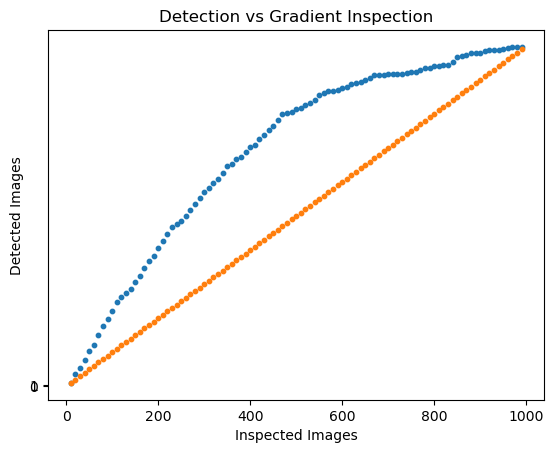

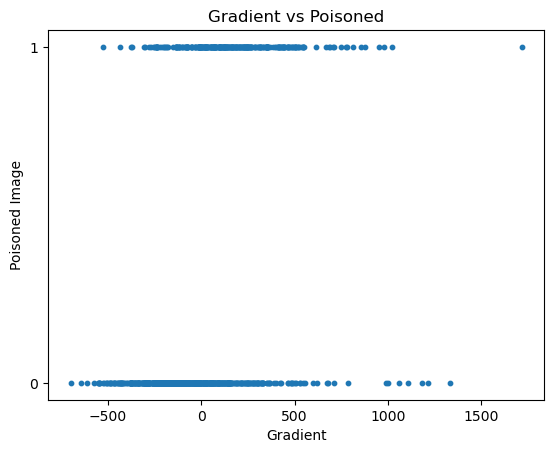

Number of poisoned images:  300  out of 10000.
last index of poison 990


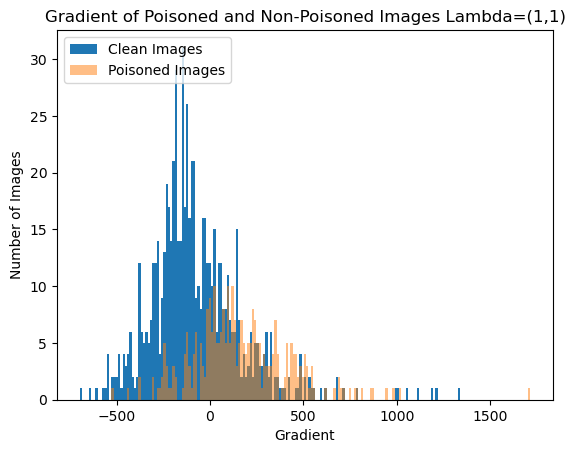

In [80]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

# 0, 1 labels mất cân bằng

In [93]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='MNIST', resize=resize, stratified=False,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

MNIST
Currrent label: 0
New label: 9 
TRAINNNN label:  tensor(9)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 9)
Currrent label: 1
New label: 8 
TRAINNNN label:  tensor(8)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, 

In [94]:
cnt1 =0
cnt0 =0
for batch in loaders['train']:
    #print(batch[0].size())
    ##print(batch[1].size())
    #print(torch.sum(batch[1] == 1).item())
    cnt1+=torch.sum(batch[1] == 1).item()
    #print(torch.sum(batch[1] == 0).item())
    cnt0+=torch.sum(batch[1] == 0).item()
print(cnt1, cnt0)
cnt1 =0
cnt0 =0
for batch in loaders['test']:
    #print(batch[0].size())
    #print(batch[1].size())
    #print(torch.sum(batch[1] == 1).item())
    cnt1+=torch.sum(batch[1] == 1).item()
    #print(torch.sum(batch[1] == 0).item())
    cnt0+=torch.sum(batch[1] == 0).item()
print(cnt1, cnt0)

187 555
109 91


In [95]:
feature_cost = FeatureCost(src_embedding = embedder,
                               src_dim = (1, resize,resize),
                               tgt_embedding = embedder,
                               tgt_dim = (1, resize,resize),
                               p = 2,
                               device='cuda')
dist = DatasetDistance(loaders['train'], loaders['test'],
                           inner_ot_method = 'exact',
                           debiased_loss = True,
                           feature_cost = feature_cost,
                           λ_x=1.0, λ_y=1.0,
                           sqrt_method = 'spectral',
                           sqrt_niters=10,
                           precision='single',
                           p = 2, entreg = 1e-1,
                           device='cuda')
dist._load_datasets(device=device)
print(dist.X1.shape, dist.X2.shape)
print(dist.Y1.shape, dist.Y2.shape)
print(dist.Y2)
print(W.shape)


  0%|          | 0/16 [00:00<?, ?it/s]

load full dataset: torch.Size([1000])


  0%|          | 0/4 [00:00<?, ?it/s]

load full dataset: torch.Size([200])
torch.Size([1000, 1024]) torch.Size([200, 1024])
torch.Size([1000]) torch.Size([200])
tensor([11, 11, 10, 11, 10, 11, 10, 10, 11, 10, 11, 10, 11, 11, 11, 11, 11, 11,
        11, 11, 10, 10, 10, 10, 11, 11, 10, 10, 10, 11, 11, 11, 11, 11, 10, 10,
        11, 10, 11, 11, 11, 11, 10, 11, 10, 11, 11, 10, 10, 11, 10, 10, 11, 11,
        10, 11, 10, 11, 11, 11, 10, 10, 11, 10, 11, 11, 11, 11, 10, 11, 10, 10,
        11, 10, 10, 11, 11, 10, 10, 11, 11, 11, 11, 11, 10, 11, 10, 11, 11, 10,
        10, 11, 11, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 10, 10, 11,
        11, 10, 10, 10, 11, 10, 11, 10, 11, 10, 10, 10, 11, 10, 10, 11, 11, 10,
        10, 11, 10, 11, 10, 10, 11, 10, 10, 10, 10, 11, 10, 10, 11, 11, 11, 10,
        11, 10, 10, 10, 10, 10, 10, 10, 11, 10, 11, 10, 11, 10, 10, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 10, 11, 10, 10, 11, 11, 11, 10, 10, 10, 11, 10,
        11, 10, 11, 10, 11, 11, 11, 10, 11, 11, 11, 11, 10, 11, 11, 11, 11, 1

In [96]:
W = dist._get_label_distances().to(torch.device(device))
print(W.shape)

10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
cost function:


  0%|          | 0/45 [00:00<?, ?it/s]

0 1
huhu: torch.Size([555, 1024]) torch.Size([187, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 187 1024
torch.Size([1, 187, 100])
torch.Size([1, 555, 187])
1 187 1024
torch.Size([1, 187, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 187, 555])
was: tensor(859.1664, device='cuda:0')
0 2
huhu: torch.Size([555, 1024]) torch.Size([31, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 31 1024
torch.Size([1, 31, 100])
torch.Size([1, 555, 31])
1 31 1024
torch.Size([1, 31, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 31, 555])
was: tensor(255.9496, device='cuda:0')
0 3
huhu: torch.Size([555, 1024]) torch.Size([30, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 30 1024
torch.Size([1, 30, 100])
torch.Size([1, 555, 30])
1 30 1024
torch.Size([1, 30, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 30, 555])
was: tensor(300.0271, device='cuda:0')
0 4
huhu: torch.Size([555, 1024]) torch.Size([27, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 27 1024
torch.Size([1, 27, 

  0%|          | 0/1 [00:00<?, ?it/s]

0 1
huhu: torch.Size([91, 1024]) torch.Size([109, 1024])
1 91 1024
torch.Size([1, 91, 100])
1 109 1024
torch.Size([1, 109, 100])
torch.Size([1, 91, 109])
1 109 1024
torch.Size([1, 109, 100])
1 91 1024
torch.Size([1, 91, 100])
torch.Size([1, 109, 91])
was: tensor(1128.8267, device='cuda:0')
10 2
[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1)]
cost function:


  0%|          | 0/20 [00:00<?, ?it/s]

0 0
huhu: torch.Size([555, 1024]) torch.Size([91, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 91 1024
torch.Size([1, 91, 100])
torch.Size([1, 555, 91])
1 91 1024
torch.Size([1, 91, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 91, 555])
was: tensor(92.0888, device='cuda:0')
0 1
huhu: torch.Size([555, 1024]) torch.Size([109, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 109 1024
torch.Size([1, 109, 100])
torch.Size([1, 555, 109])
1 109 1024
torch.Size([1, 109, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 109, 555])
was: tensor(1106.7522, device='cuda:0')
1 0
huhu: torch.Size([187, 1024]) torch.Size([91, 1024])
1 187 1024
torch.Size([1, 187, 100])
1 91 1024
torch.Size([1, 91, 100])
torch.Size([1, 187, 91])
1 91 1024
torch.Size([1, 91, 100])
1 187 1024
torch.Size([1, 187, 100])
torch.Size([1, 91, 187])
was: tensor(868.6443, device='cuda:0')
1 1
huhu: torch.Size([187, 1024]) torch.Size([109, 1024])
1 187 1024
torch.Size([1, 187, 100])
1 109 1024
torch.Size([1, 10

In [97]:
cost_geomloss = partial(
                batch_augmented_cost,
                W=W,
                λ_x=dist.λ_x,
                λ_y=dist.λ_y,
                feature_cost=dist.feature_cost
            )

loss = geomloss.SamplesLoss(
                loss=dist.loss, p=dist.p,
                cost=cost_geomloss,
                debias=dist.debiased_loss,
                blur=dist.entreg**(1 / dist.p),
                backend='tensorized'
            )

In [98]:
maxsamples = None
if maxsamples and dist.X1.shape[0] > maxsamples:
    idxs_1 = sorted(np.random.choice(
    dist.X1.shape[0], maxsamples, replace=False))
else:
    idxs_1 = np.s_[:]  # hack to get a full slice

if maxsamples and dist.X2.shape[0] > maxsamples:
    idxs_2 = sorted(np.random.choice(
    dist.X2.shape[0], maxsamples, replace=False))
else:
    idxs_2 = np.s_[:]  # hack to get a full slice
Z1 = torch.cat((dist.X1[idxs_1],
                dist.Y1[idxs_1].type(dist.X1.dtype).unsqueeze(1)), -1)
Z2 = torch.cat((dist.X2[idxs_2],
                dist.Y2[idxs_2].type(dist.X2.dtype).unsqueeze(1)), -1)
Z1 = Z1.to(device)
Z2 = Z2.to(device)

In [99]:
with torch.no_grad():
    loss.debias = False
    loss.potentials = True
    print(Z1.shape, Z2.shape)
    F_i, G_j = loss(Z1, Z2)

torch.Size([1000, 1025]) torch.Size([200, 1025])
Z1 shape in batch:  torch.Size([1, 1000, 1025])
Z2 shape in batch:  torch.Size([1, 200, 1025])
1 1000 1024
torch.Size([1, 1000, 100])
1 200 1024
torch.Size([1, 200, 100])
torch.Size([1, 1000, 200])
torch.Size([1, 1000, 200])
Gia tri M: tensor([[[11, 11, 10,  ..., 11, 10, 10],
         [11, 11, 10,  ..., 11, 10, 10],
         [11, 11, 10,  ..., 11, 10, 10],
         ...,
         [23, 23, 22,  ..., 23, 22, 22],
         [23, 23, 22,  ..., 23, 22, 22],
         [23, 23, 22,  ..., 23, 22, 22]]], device='cuda:0')
torch.Size([1, 1000, 200])
torch.Size([1, 1000, 200])
gia tri D: tensor([[[6453.8877, 2967.9053, 4213.6929,  ..., 1310.1222, 4209.4624,
          1781.6909],
         [2848.7041, 1528.1398, 2259.4897,  ..., 2037.5909, 1271.9507,
           481.0229],
         [1296.4718, 2012.3370, 1033.0972,  ..., 5328.5400,  188.9409,
           706.6304],
         ...,
         [2324.7200, 1032.2689, 3972.3184,  ..., 1206.4545, 2212.0918,
       

In [100]:
π = [F_i, G_j]
dual_sol = π
for i in range(len(dual_sol)):
    dual_sol[i] = dual_sol[i].to('cpu')

In [101]:
train_indices = get_indices(loaders['train'])
trained_with_flag = train_with_corrupt_flag(loaders['train'], shuffle_ind, train_indices)

inspected: 10, found: 4 detection rate: 0.01 baseline: 1.8
inspected: 20, found: 8 detection rate: 0.03 baseline: 3.6
inspected: 30, found: 11 detection rate: 0.04 baseline: 5.4
inspected: 40, found: 16 detection rate: 0.05 baseline: 7.2
inspected: 50, found: 19 detection rate: 0.06 baseline: 9.0
inspected: 60, found: 24 detection rate: 0.08 baseline: 10.8
inspected: 70, found: 26 detection rate: 0.09 baseline: 12.6
inspected: 80, found: 33 detection rate: 0.11 baseline: 14.4
inspected: 90, found: 41 detection rate: 0.14 baseline: 16.2
inspected: 100, found: 45 detection rate: 0.15 baseline: 18.0
inspected: 110, found: 48 detection rate: 0.16 baseline: 19.8
inspected: 120, found: 54 detection rate: 0.18 baseline: 21.6
inspected: 130, found: 60 detection rate: 0.20 baseline: 23.400000000000002
inspected: 140, found: 63 detection rate: 0.21 baseline: 25.2
inspected: 150, found: 65 detection rate: 0.22 baseline: 27.0
inspected: 160, found: 67 detection rate: 0.22 baseline: 28.8
inspected:

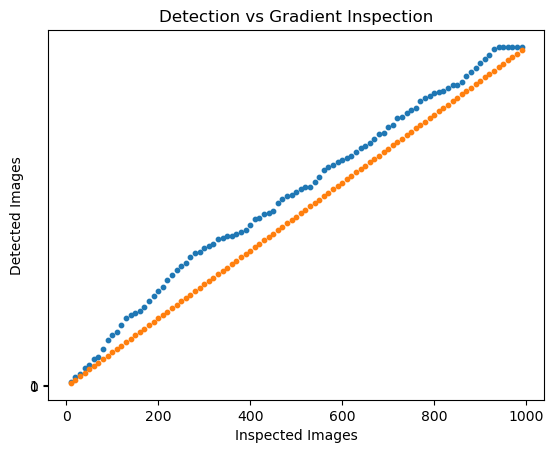

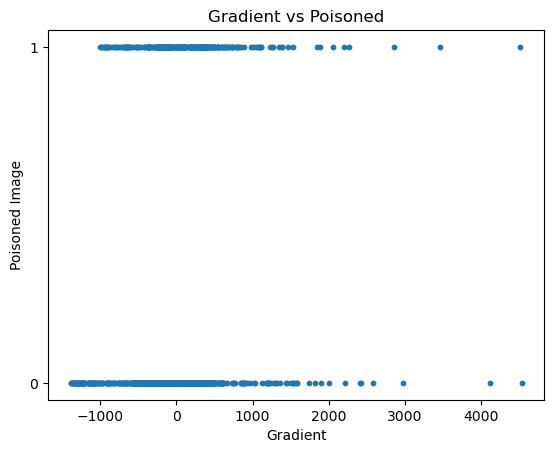

Number of poisoned images:  300  out of 10000.
last index of poison 931


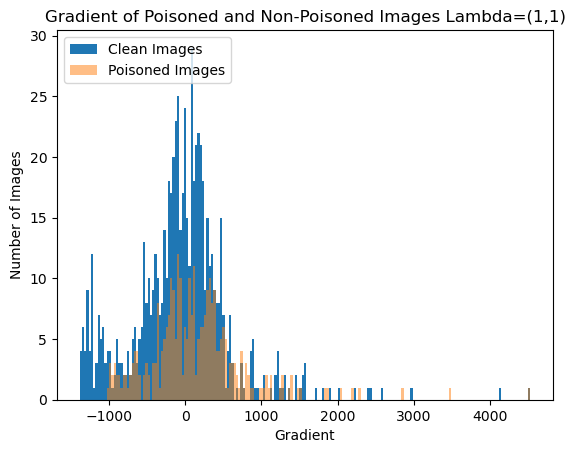

In [102]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

In [28]:
dataname='MNIST'
valid_size=0 
random_seed=2021 
resize = resize
stratified=True 
shuffle=False
maxsize=training_size 
maxsize_test = valid_size
shuffle_per=portion

In [32]:
def load_torchvision_data_shuffle(dataname, valid_size=0.1, splits=None, shuffle=True,
                    stratified=False, random_seed=None, batch_size = 64,
                    resize=None, to3channels=False,
                    maxsize = None, maxsize_test=None, num_workers = 0, transform=None,
                    data=None, datadir=None, download=True, filt=False, print_stats = False, shuffle_per=0, label_ratio=0.3):
    """ Load torchvision datasets.

        We return train and test for plots and post-training experiments
    """
    
    if shuffle == True and random_seed:
        np.random.seed(random_seed)
    elif random_seed:
        np.random.seed(random_seed)
    if transform is None:
        if dataname in DATASET_NORMALIZATION.keys():
            transform_dataname = dataname
        else:
            transform_dataname = 'ImageNet'

        transform_list = []

        if dataname in ['MNIST', 'USPS'] and to3channels:
            transform_list.append(torchvision.transforms.Grayscale(3))

        transform_list.append(torchvision.transforms.ToTensor())
        transform_list.append(
            torchvision.transforms.Normalize(*DATASET_NORMALIZATION[transform_dataname])
        )

        if resize:
            if not dataname in DATASET_SIZES or DATASET_SIZES[dataname][0] != resize:
                ## Avoid adding an "identity" resizing
                transform_list.insert(0, transforms.Resize((resize, resize)))

        transform = transforms.Compose(transform_list)
        logger.info(transform)
        train_transform, valid_transform = transform, transform
    elif data is None:
        if len(transform) == 1:
            train_transform, valid_transform = transform, transform
        elif len(transform) == 2:
            train_transform, valid_transform = transform
        else:
            raise ValueError()

    if data is None:
        DATASET = getattr(torchvision.datasets, dataname)
        if datadir is None:
            datadir = DATA_DIR
        if dataname == 'EMNIST':
            split = 'letters'
            train = DATASET(datadir, split=split, train=True, download=download, transform=train_transform)
            test = DATASET(datadir, split=split, train=False, download=download, transform=valid_transform)
            ## EMNIST seems to have a bug - classes are wrong
            _merged_classes = set(['C', 'I', 'J', 'K', 'L', 'M', 'O', 'P', 'S', 'U', 'V', 'W', 'X', 'Y', 'Z'])
            _all_classes = set(list(string.digits + string.ascii_letters))
            classes_split_dict = {
                'byclass': list(_all_classes),
                'bymerge': sorted(list(_all_classes - _merged_classes)),
                'balanced': sorted(list(_all_classes - _merged_classes)),
                'letters': list(string.ascii_lowercase),
                'digits': list(string.digits),
                'mnist': list(string.digits),
            }
            train.classes = classes_split_dict[split]
            if split == 'letters':
                ## The letters fold (and only that fold!!!) is 1-indexed
                train.targets -= 1
                test.targets -= 1
        elif dataname == 'STL10':
            train = DATASET(datadir, split='train', download=download, transform=train_transform)
            test = DATASET(datadir, split='test', download=download, transform=valid_transform)
            train.classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']
            test.classes = train.classes
            train.targets = torch.tensor(train.labels)
            test.targets = torch.tensor(test.labels)
        elif dataname == 'SVHN':
            train = DATASET(datadir, split='train', download=download, transform=train_transform)
            test = DATASET(datadir, split='test', download=download, transform=valid_transform)
            ## In torchvision, SVHN 0s have label 0, not 10
            train.classes = test.classes = [str(i) for i in range(10)]
            train.targets = torch.tensor(train.labels)
            test.targets = torch.tensor(train.labels)
        elif dataname == 'LSUN':
            # pdb.set_trace()
            train = DATASET(datadir, classes='train', download=download, transform=train_transform)
        else:
            train = DATASET(datadir, train=True, download=download, transform=train_transform)
            test = DATASET(datadir, train=False, download=download, transform=valid_transform)
            #print("HEHE DATASET")
    else:
        train, test = data

#     print("Train Type: ", type(train), " Train: ", train)
#     print("Teest Type: ", type(test), " Train: ", test)
    

    if type(train.targets) is list:
        train.targets = torch.LongTensor(train.targets)
        test.targets  = torch.LongTensor(test.targets)

    if not hasattr(train, 'classes') or not train.classes:
        train.classes = sorted(torch.unique(train.targets).tolist())
        test.classes  = sorted(torch.unique(train.targets).tolist())

######################## ------------------------- MNIST MNIST MNIST MNIST MN -------------------------- ##########################
######################## ------------------------- NIST MNIST MNIST MNIST MNI -------------------------- ##########################
######################## ------------------------- IST MNIST MNIST MNIST MNIS -------------------------- ##########################
######################## ------------------------- ST MNIST MNIST MNIST MNIST -------------------------- ##########################

    def filter_labels(dataset, labels):
        mask = (dataset.targets == labels[0]) | (dataset.targets == labels[1])
        dataset.data = dataset.data[mask]
        dataset.targets = dataset.targets[mask]
        return dataset
    def adjust_label_ratio(dataset, labels, ratio):
        # Separate the data by labels
        data_label_0 = dataset.data[dataset.targets == labels[0]]
        data_label_1 = dataset.data[dataset.targets == labels[1]]
    
        # Adjust the amount of label 1 relative to label 0
        num_label_0 = len(data_label_0)
        num_label_1 = min(len(data_label_1), int(num_label_0 * ratio))
    
    # Combine the adjusted datasets
        adjusted_data = torch.cat((data_label_0, data_label_1[:num_label_1]))
        adjusted_targets = torch.cat((torch.full((num_label_0,), labels[0], dtype=torch.long), 
                                  torch.full((num_label_1,), labels[1], dtype=torch.long)))
    
    # Ensure the data and targets match the original dataset's data type and shape
        dataset.data = adjusted_data
        dataset.targets = adjusted_targets
        return dataset
        return dataset
    train = filter_labels(train, [0, 1])
    test = filter_labels(test, [0, 1])
    train = adjust_label_ratio(train, [0, 1], label_ratio)
###### VALIDATION IS 0 SO NOT WORRY NOW ######
    ### Data splitting
    fold_idxs    = {}
    if splits is None and valid_size == 0:
        ## Only train
        fold_idxs['train'] = np.arange(len(train))
        
    elif splits is None and valid_size > 0:
        ## Train/Valid
        train_idx, valid_idx = random_index_split(len(train), 1-valid_size, (maxsize, None)) # No maxsize for validation
        fold_idxs['train'] = train_idx
        fold_idxs['valid'] = valid_idx
    elif splits is not None:
        ## Custom splits - must be integer.
        if type(splits) is dict:
            snames, slens = zip(*splits.items())
        elif type(splits) in [list, np.ndarray]:
            snames = ['split_{}'.format(i) for i in range(len(splits))]
            slens  = splits
        slens = np.array(slens)
        if any(slens < 0): # Split expressed as -1, i.e., 'leftover'
            assert sum(slens < 0) == 1, 'Can only deal with one split being -1'
            idx_neg = np.where(slens == -1)[0][0]
            slens[idx_neg] = len(train) - np.array([x for x in slens if x > 0]).sum()
        elif slens.sum() > len(train):
            logging.warning("Not enough samples to satify splits..cropping train...")
            if 'train' in snames:
                slens[snames.index('train')] = len(train) - slens[np.array(snames) != 'train'].sum()

        idxs = np.arange(len(train))
        if not stratified:
            np.random.shuffle(idxs)
        else:
            ## If stratified, we'll interleave the per-class shuffled indices
            idxs_class = [np.random.permutation(np.where(train.targets==c)).T for c in np.unique(train.targets)]
            idxs = interleave(*idxs_class).squeeze().astype(int)

        slens = np.array(slens).cumsum() # Need to make cumulative for np.split
        split_idxs = [np.sort(s) for s in np.split(idxs, slens)[:-1]] # The last one are leftovers
        assert len(split_idxs) == len(splits)
        fold_idxs = {snames[i]: v for i,v in enumerate(split_idxs)}


    # fold_idxs['train'] = np.arange(len(train)) start -> stop by step
    for k, idxs in fold_idxs.items():
        if maxsize and maxsize < len(idxs):
            fold_idxs[k] = np.sort(np.random.choice(idxs, maxsize, replace = False))
 
    sampler_class = SubsetRandomSampler if shuffle else SubsetSampler
    fold_samplers = {k: sampler_class(idxs) for k,idxs in fold_idxs.items()}
    

#  ░██████╗██╗░░██╗██╗░░░██╗███████╗███████╗██╗░░░░░███████╗
#  ██╔════╝██║░░██║██║░░░██║██╔════╝██╔════╝██║░░░░░██╔════╝
#  ╚█████╗░███████║██║░░░██║█████╗░░█████╗░░██║░░░░░█████╗░░
#  ░╚═══██╗██╔══██║██║░░░██║██╔══╝░░██╔══╝░░██║░░░░░██╔══╝░░
#  ██████╔╝██║░░██║╚██████╔╝██║░░░░░██║░░░░░███████╗███████╗
#  ╚═════╝░╚═╝░░╚═╝░╚═════╝░╚═╝░░░░░╚═╝░░░░░╚══════╝╚══════╝

    
    old_train = train
    #old_test = fold_idxs['test']
    if shuffle_per != 0:
        
        total_shuffles = int(shuffle_per * len(fold_idxs['train']))
        
        shuffle_inds = np.random.choice(sorted(fold_idxs['train']), size=total_shuffles, replace=False)
        
        
        if dataname == 'CIFAR10':
            print("CIFAR TEN")
            for index in shuffle_inds:
                cur_label = train.targets[index]
                new_label = np.random.randint(10)
                while new_label == cur_label:
                    new_label = np.random.randint(10)
                cur_label = new_label
                # print("TRAINNNN: ", train[index])
                train.targets[index] = cur_label
        elif dataname == 'CIFAR100':
            print("CIFAR HUNDRED")
            for index in shuffle_inds:
                cur_label = train.targets[index]
                new_label = np.random.randint(100)
                while new_label == cur_label:
                    new_label = np.random.randint(100)
                cur_label = new_label
                # print("TRAINNNN: ", train[index])
                train.targets[index] = cur_label
        elif dataname == 'MNIST':
            print("MNIST")
            for index in shuffle_inds:
                cur_label = train.targets[index]
                print(f'Currrent label: {cur_label}')
                new_label = np.random.randint(10)
                while new_label == cur_label:
                    new_label = np.random.randint(10)
                cur_label = new_label
                print(f'New label: {cur_label} ')
                # print("TRAINNNN: ", train[index])
                train.targets[index] = cur_label
                print("TRAINNNN label: ", train.targets[index])
                print("TRAINNNN: ", train[index])
        elif dataname == 'FashionMNIST':
            print("FashionistaMNIST")
            for index in shuffle_inds:
                cur_label = train.targets[index]
                new_label = np.random.randint(10)
                while new_label == cur_label:
                    new_label = np.random.randint(10)
                cur_label = new_label
                # print("TRAINNNN: ", train[index])
                train.targets[index] = cur_label
                
        ########## FOR other datasets such as STL10 and ImageNet, we cannot directly modify labels
        ########## so will need to recreate the dataloader! time consuming!
        
        elif dataname == 'STL10' or dataname == 'ImageNet':
            print("STL11")
            if dataname == 'ImageNet':
                print('IMAGI')
                DATASET = getattr(torchvision.datasets, dataname)
            new_train = DATASET
            new_train.targets = {}
            new_train.classes = {}
            new_train.targets = train.targets
            new_train.classes = train.classes
            
            new_ds_imgs = []
            new_ds_labs = []
            class_len = len(train.classes)
            for i in range(len(train)):
                new_ds_imgs.append(train[i][0].permute(1,2,0))
                if i in shuffle_inds:
                    cur_label = train.targets[i]
                    new_label = np.random.randint(class_len)
#                     print(f'{i}.Currrent label: {cur_label} ')
                    while new_label == cur_label:
                        new_label = np.random.randint(class_len)
                    cur_label = new_label
                    train.targets[i] = cur_label
#                     print(f'{i}.New label: {cur_label} ')
                    new_ds_labs.append(torch.tensor(cur_label).reshape(1))
                else:
                    new_ds_labs.append(torch.tensor(train[i][1]).reshape(1))
            new_ds_imgs = torch.stack(new_ds_imgs, dim=0)
            new_ds_labs = torch.cat(new_ds_labs)
            new_ds_imgs = new_ds_imgs.numpy()
            new_ds_labs = new_ds_labs.numpy()
            
            new_ds = (new_ds_imgs, new_ds_labs)
            
            
            new_train.targets = train.targets
            new_transform_list = []
            new_transform_list.append(torchvision.transforms.ToTensor())
            new_transform = transforms.Compose(new_transform_list)
            new_train = CustomTensorDataset2(new_ds, transform = new_transform)
            train = new_train
            
            
            if type(train.targets) is np.ndarray:
                train.targets = train.targets.tolist()

            if type(train.targets) is list:
                train.targets = torch.LongTensor(train.targets)
            
            if not hasattr(train, 'classes') or not train.classes:
#                 train.classes = ['airplane', 'bird', 'car', 'cat', 'deer', 'dog', 'horse', 'monkey', 'ship', 'truck']
                train.classes = sorted(torch.unique(train.targets).tolist())
    ### Create DataLoaders
    dataloader_args = dict(batch_size=batch_size,num_workers=num_workers)

    fold_loaders = {k: dataloader.DataLoader(train, sampler=sampler,**dataloader_args)
                    for k,sampler in fold_samplers.items()}

    
    if maxsize_test and maxsize_test < len(test):
        test_idxs = np.sort(np.random.choice(len(test), maxsize_test, replace = False))
        sampler_test = SubsetSampler(test_idxs) # For test don't want Random
        dataloader_args['sampler'] = sampler_test
    else:
        dataloader_args['shuffle'] = False
    test_loader = dataloader.DataLoader(test, **dataloader_args)
    fold_loaders['test'] = test_loader

    fnames, flens = zip(*[[k,len(v)] for k,v in fold_idxs.items()])
    fnames = '/'.join(list(fnames) + ['test'])
    flens  = '/'.join(map(str, list(flens) + [len(test)]))

    if hasattr(train, 'data'):
        logger.info('Input Dim: {}'.format(train.data.shape[1:]))
    logger.info('Classes: {} (effective: {})'.format(len(train.classes), len(torch.unique(train.targets))))

    if shuffle_per != 0:
            return fold_loaders, {'train': train, 'test':test}, shuffle_inds, {'train': old_train, 'test': test}
    return fold_loaders, {'train': train, 'test':test}

# MNIST trên tập dataset không cân bằng kết hợp các kĩ thuật như SMOTE

baseline

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.data import DataLoader, Subset
from torchvision.datasets import MNIST

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
mnist_train = MNIST(root='./data', train=True, download=True, transform=transform)

# Filter only classes 0 and 1
indices = np.where((mnist_train.targets == 0) | (mnist_train.targets == 1))[0]
mnist_subset = Subset(mnist_train, indices)

# Use a pre-trained model to extract features
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Identity()  # Remove the final classification layer
model.eval()

# Create a DataLoader
data_loader = DataLoader(mnist_subset, batch_size=64, shuffle=False)

# Extract features
features = []
labels = []

with torch.no_grad():
    for inputs, targets in data_loader:
        outputs = model(inputs)
        features.append(outputs)
        labels.append(targets)

features = torch.cat(features).numpy()
labels = torch.cat(labels).numpy()

# Check feature shape
print(f'Feature shape: {features.shape}')

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Reduce dimensionality to 512 dimensions using PCA (if necessary)
pca = PCA(n_components=512)
features_reduced = pca.fit_transform(features_scaled)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(features_reduced, labels)

# Summarize class distribution
from collections import Counter
print(f'Original dataset shape: {Counter(labels)}')
print(f'Resampled dataset shape: {Counter(y_res)}')

# Optionally, visualize the features in 2D using PCA
pca_2d = PCA(n_components=2)
features_2d = pca_2d.fit_transform(X_res)

plt.figure(figsize=(10, 5))

plt.scatter(features_2d[y_res == 0][:, 0], features_2d[y_res == 0][:, 1], label='Class 0', alpha=0.5)
plt.scatter(features_2d[y_res == 1][:, 0], features_2d[y_res == 1][:, 1], label='Class 1', alpha=0.5)
plt.legend()
plt.title('SMOTE Resampled Features in 2D')
plt.show()

In [1]:
import pickle

# Tải mô hình từ tệp .pickle
with open('save_x1y1x2y2.txt', 'rb') as file:
    model = pickle.load(file)

In [2]:
print(len(model))

4


In [4]:
X1, y1, X2, y2 = model
print(X1.shape)
print(X2.shape)
print(y1.shape)
print(y2.shape)

torch.Size([1000, 1024])
torch.Size([200, 1024])
torch.Size([1000])
torch.Size([200])


In [17]:
num1_y1 = torch.sum(y1 == 1).item()
print(num1_y1)
num0_y1 = torch.sum(y1 == 0).item()
print(num0_y1)

187
555


In [19]:
dataname='MNIST'
random_seed=2021 
resize = resize
stratified=False 
shuffle=False
maxsize=training_size 
maxsize_test = valid_size
shuffle_per=portion

In [21]:
import os
import pdb
from functools import partial
import random
import logging
import string

import numpy as np
import torch


In [25]:
logger = logging.getLogger(__name__)
DATASET_NCLASSES = {
    'MNIST': 10,
    'FashionMNIST': 10,
    'EMNIST': 26,
    'KMNIST': 10,
    'USPS': 10,
    'CIFAR10': 10,
    'SVHN': 10,
    'STL10': 10,
    'LSUN': 10,
    'tiny-ImageNet': 200
}

DATASET_SIZES = {
    'MNIST': (28,28),
    'FashionMNIST': (28,28),
    'EMNIST': (28,28),
    'QMNIST': (28,28),
    'KMNIST': (28,28),
    'USPS': (16,16),
    'SVHN': (32, 32),
    'CIFAR10': (32, 32),
    'STL10': (96, 96),
    'tiny-ImageNet': (64,64)
}

DATASET_NORMALIZATION = {
    'MNIST': ((0.1307,), (0.3081,)),
    'USPS' : ((0.1307,), (0.3081,)),
    'FashionMNIST' : ((0.1307,), (0.3081,)),
    'QMNIST' : ((0.1307,), (0.3081,)),
    'EMNIST' : ((0.1307,), (0.3081,)),
    'KMNIST' : ((0.1307,), (0.3081,)),
    'ImageNet': ((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
    'tiny-ImageNet': ((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
    'CIFAR10': ((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
    'CIFAR100': ((0.485, 0.456, 0.406),(0.229, 0.224, 0.225)),
    'STL10': ((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))
}

In [36]:
from otdd import DATA_DIR
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torch.utils.data.dataloader as dataloader


In [30]:
class SubsetSampler(torch.utils.data.Sampler):
    r"""Samples elements in order (not randomly) from a given list of indices, without replacement.

    Arguments:
        indices (sequence): a sequence of indices
        (this is identical to torch's SubsetRandomSampler except not random)
    """

    def __init__(self, indices):
        self.indices = indices

    def __iter__(self):
        return (self.indices[i] for i in range(len(self.indices)))

    def __len__(self):
        return len(self.indices)

In [37]:
loaders, full_dict, shuffle_ind, old_dict = load_torchvision_data_shuffle(dataname, splits=None, shuffle=shuffle,
                    stratified=stratified, random_seed=random_seed, batch_size = 64,
                    resize=resize, to3channels=False,
                    maxsize = maxsize, maxsize_test=maxsize_test, num_workers = 0, transform=None,
                    data=None, datadir=None, download=True, filt=False, print_stats = False, shuffle_per=shuffle_per, label_ratio=0.3)

MNIST
Currrent label: 0
New label: 9 
TRAINNNN label:  tensor(9)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 9)
Currrent label: 1
New label: 8 
TRAINNNN label:  tensor(8)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, 

In [38]:
full_dict

{'train': Dataset MNIST
     Number of datapoints: 7699
     Root location: c:\Users\21520\PycharmProjects\LAVA\LAVA\data
     Split: Train
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            ),
 'test': Dataset MNIST
     Number of datapoints: 2115
     Root location: c:\Users\21520\PycharmProjects\LAVA\LAVA\data
     Split: Test
     StandardTransform
 Transform: Compose(
                Resize(size=(32, 32), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Normalize(mean=(0.1307,), std=(0.3081,))
            )}

In [42]:
old_dict['train'].shape

(1000,)

In [43]:
old_dict['train']

array([   0,    1,    6,   18,   21,   33,   38,   49,   53,   68,   72,
         75,   78,   83,   88,   97,  115,  137,  138,  139,  144,  148,
        152,  159,  163,  166,  168,  180,  192,  214,  224,  236,  243,
        256,  273,  279,  280,  281,  285,  297,  311,  312,  331,  339,
        342,  343,  350,  355,  356,  358,  365,  386,  395,  412,  421,
        430,  432,  440,  442,  446,  450,  451,  457,  463,  465,  466,
        468,  487,  496,  501,  506,  524,  527,  534,  577,  580,  588,
        590,  594,  621,  628,  635,  641,  642,  645,  650,  651,  653,
        662,  676,  681,  687,  725,  727,  735,  737,  738,  743,  759,
        778,  789,  799,  811,  815,  816,  817,  825,  834,  837,  840,
        844,  854,  877,  889,  890,  893,  898,  899,  904,  913,  915,
        927,  934,  944,  945,  950,  953,  954,  955,  963,  973,  976,
        981,  986,  987,  988,  998, 1024, 1029, 1034, 1042, 1045, 1051,
       1055, 1062, 1073, 1077, 1102, 1107, 1112, 11

In [47]:
loaders, shuffle_ind = lava.load_data_corrupted(corrupt_type='shuffle', dataname='MNIST', resize=resize, stratified=False,
                                        training_size=training_size, test_size=valid_size, currupt_por=portion)

MNIST
Currrent label: 0
New label: 9 
TRAINNNN label:  tensor(9)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]), 9)
Currrent label: 1
New label: 8 
TRAINNNN label:  tensor(8)
TRAINNNN:  (tensor([[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         ...,
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
         [-0.4242, -0.4242, -0.4242, 

In [12]:
cnt1 =0
cnt0 =0
for batch in loaders['train']:
    #print(batch[0].size())
    ##print(batch[1].size())
    #print(torch.sum(batch[1] == 1).item())
    cnt1+=torch.sum(batch[1] == 1).item()
    #print(torch.sum(batch[1] == 0).item())
    cnt0+=torch.sum(batch[1] == 0).item()
print(cnt1, cnt0)
cnt1 =0
cnt0 =0
for batch in loaders['test']:
    #print(batch[0].size())
    #print(batch[1].size())
    #print(torch.sum(batch[1] == 1).item())
    cnt1+=torch.sum(batch[1] == 1).item()
    #print(torch.sum(batch[1] == 0).item())
    cnt0+=torch.sum(batch[1] == 0).item()
print(cnt1, cnt0)

187 555
109 91


In [13]:
import geomloss
import numpy as np
from otdd.pytorch.distance_fast import DatasetDistance, FeatureCost, batch_augmented_cost
from otdd.pytorch.wasserstein import pwdist_exact, efficient_pwdist_gauss
from functools import partial
from lava import train_with_corrupt_flag, get_indices

# augment 

In [54]:
feature_cost = FeatureCost(src_embedding = embedder,
                               src_dim = (1, resize,resize),
                               tgt_embedding = embedder,
                               tgt_dim = (1, resize,resize),
                               p = 2,
                               device='cuda')
dist = DatasetDistance(loaders['train'], loaders['test'], method='augmentation',
                        diagonal_cov=True, 
                        inner_ot_method = 'gaussian_approx',
                        debiased_loss = True,
                        feature_cost = feature_cost,
                        λ_x=1.0, λ_y=1.0,
                        sqrt_method = 'spectral',
                        sqrt_niters=10,
                        precision='single',
                        p = 2, entreg = 1e-1,
                        device='cuda')
dist._load_datasets(device=device)
print(dist.X1.shape, dist.X2.shape)
print(dist.Y1.shape, dist.Y2.shape)
print(dist.Y2)


  0%|          | 0/16 [00:00<?, ?it/s]

load full dataset: torch.Size([1000])


  0%|          | 0/4 [00:00<?, ?it/s]

load full dataset: torch.Size([200])
torch.Size([1000, 1024]) torch.Size([200, 1024])
torch.Size([1000]) torch.Size([200])
tensor([11, 11, 10, 11, 10, 11, 10, 10, 11, 10, 11, 10, 11, 11, 11, 11, 11, 11,
        11, 11, 10, 10, 10, 10, 11, 11, 10, 10, 10, 11, 11, 11, 11, 11, 10, 10,
        11, 10, 11, 11, 11, 11, 10, 11, 10, 11, 11, 10, 10, 11, 10, 10, 11, 11,
        10, 11, 10, 11, 11, 11, 10, 10, 11, 10, 11, 11, 11, 11, 10, 11, 10, 10,
        11, 10, 10, 11, 11, 10, 10, 11, 11, 11, 11, 11, 10, 11, 10, 11, 11, 10,
        10, 11, 11, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 10, 10, 11,
        11, 10, 10, 10, 11, 10, 11, 10, 11, 10, 10, 10, 11, 10, 10, 11, 11, 10,
        10, 11, 10, 11, 10, 10, 11, 10, 10, 10, 10, 11, 10, 10, 11, 11, 11, 10,
        11, 10, 10, 10, 10, 10, 10, 10, 11, 10, 11, 10, 11, 10, 10, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 10, 11, 10, 10, 11, 11, 11, 10, 10, 10, 11, 10,
        11, 10, 11, 10, 11, 11, 11, 10, 11, 11, 11, 11, 10, 11, 11, 11, 11, 1

In [61]:
W = dist._get_label_distances().to(torch.device(device))

in MOMENTS:  False
in MOMENTS:  False


0it [00:00, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])

0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])


  0%|          | 0/20 [00:00<?, ?it/s]

1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])
1 1 1024
torch.Size([1, 1, 100])
torch.Size([1, 1, 1])
1 1 1024
torch.Size([1, 1, 100])

In [57]:
loss = geomloss.SamplesLoss(
                loss=dist.loss, p=dist.p,
                debias=dist.debiased_loss,
                blur=dist.entreg**(1 / dist.p), # "blur" of geomloss is eps^(1/p).
                backend='tensorized',
                )

In [62]:
print(dist.Means[0])
print(dist.Covs[0])
print(dist.Means[1])
print(dist.Covs[1])

tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        ...,
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
        [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [63]:
print(dist.Means[0].shape)
print(dist.Covs[0].shape)
print(dist.Means[1].shape)
print(dist.Covs[1].shape)

torch.Size([10, 1024])
torch.Size([10, 1024])
torch.Size([2, 1024])
torch.Size([2, 1024])


In [71]:
maxsamples = 2000

In [68]:
from otdd.pytorch.utils import augmented_dataset

In [72]:
DA = (X1, y1)
DB = (X2, y2)
XA = augmented_dataset(DA, dist.Means[0], dist.Covs[0], maxn=maxsamples)
XB = augmented_dataset(DB, dist.Means[1], dist.Covs[1], maxn=maxsamples)

In [73]:
print(XA.shape)
print(XB.shape)

torch.Size([1000, 3072])
torch.Size([200, 3072])


In [74]:
loss = geomloss.SamplesLoss(
                loss=dist.loss, p=dist.p,
                debias=dist.debiased_loss,
                blur=dist.entreg**(1 / dist.p), # "blur" of geomloss is eps^(1/p).
                backend='tensorized',
                )

In [75]:
distance = loss(XA, XB)

In [76]:
distance

tensor(369.6609)

In [77]:
with torch.no_grad():
    loss.debias = False
    loss.potentials = True
    print(XA.shape, XB.shape)
    F_i, G_j = loss(XA, XB)

torch.Size([1000, 3072]) torch.Size([200, 3072])


In [78]:
π = [F_i, G_j]
dual_sol = π
for i in range(len(dual_sol)):
    dual_sol[i] = dual_sol[i].to('cpu')

In [79]:
train_indices = get_indices(loaders['train'])
trained_with_flag = train_with_corrupt_flag(loaders['train'], shuffle_ind, train_indices)

inspected: 10, found: 8 detection rate: 0.03 baseline: 1.8
inspected: 20, found: 17 detection rate: 0.06 baseline: 3.6
inspected: 30, found: 23 detection rate: 0.08 baseline: 5.4
inspected: 40, found: 29 detection rate: 0.10 baseline: 7.2
inspected: 50, found: 36 detection rate: 0.12 baseline: 9.0
inspected: 60, found: 42 detection rate: 0.14 baseline: 10.8
inspected: 70, found: 47 detection rate: 0.16 baseline: 12.6
inspected: 80, found: 54 detection rate: 0.18 baseline: 14.4
inspected: 90, found: 59 detection rate: 0.20 baseline: 16.2
inspected: 100, found: 63 detection rate: 0.21 baseline: 18.0
inspected: 110, found: 66 detection rate: 0.22 baseline: 19.8
inspected: 120, found: 71 detection rate: 0.24 baseline: 21.6
inspected: 130, found: 76 detection rate: 0.25 baseline: 23.400000000000002
inspected: 140, found: 82 detection rate: 0.27 baseline: 25.2
inspected: 150, found: 87 detection rate: 0.29 baseline: 27.0
inspected: 160, found: 93 detection rate: 0.31 baseline: 28.8
inspected

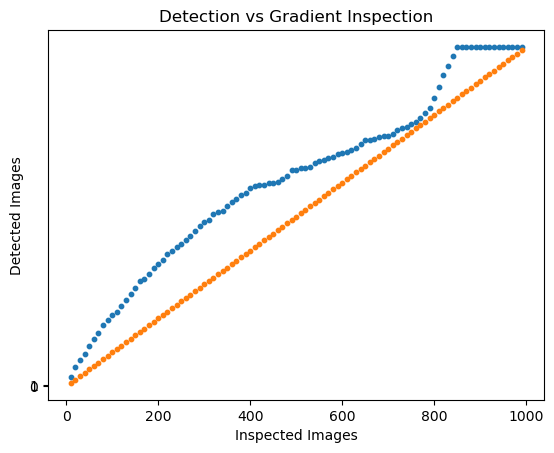

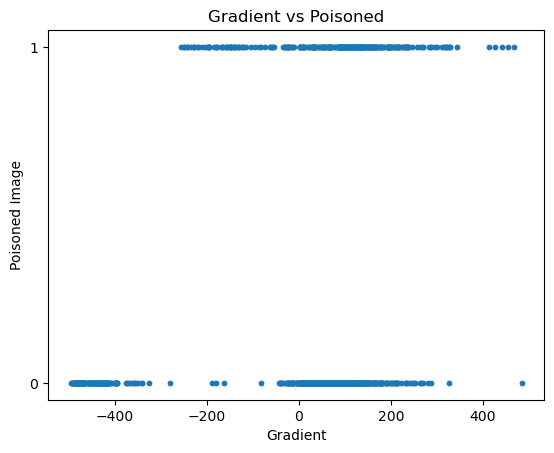

Number of poisoned images:  300  out of 10000.
last index of poison 847


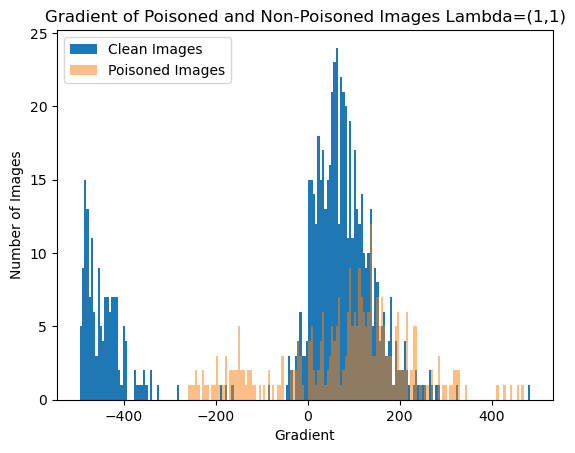

In [80]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag, training_size, portion)

# continue

In [73]:
train_indices = get_indices(loaders['train'])
trained_with_flag = train_with_corrupt_flag(loaders['train'], shuffle_ind, train_indices)

In [44]:
for tr in trained_with_flag:
    print(tr[0].shape, tr[1], tr[2])

torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(6) True
torch.Size([1, 32, 32]) tensor(2) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(5) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(8) True
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(9) True
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(0) False
torch.Size([1, 32, 32]) tensor(8) True
torch.Size

In [38]:
all_data = []
all_labels = []

for data, labels in loaders['train']:
    all_data.append(data)
    all_labels.append(labels)

all_data = torch.cat(all_data)
all_labels = torch.cat(all_labels)

In [39]:
print(all_labels.shape)
print(all_data.shape)

torch.Size([1000])
torch.Size([1000, 1, 32, 32])


In [23]:
# Reshape dữ liệu để SMOTE có thể xử lý
n_samples, channels, height, width = all_data.shape
all_data_flat = all_data.view(n_samples, -1).numpy()
all_labels_flat = all_labels.numpy()

In [24]:
print(all_labels.shape)
print(all_data_flat.shape)

(1000,)
(1000, 1024)


In [25]:
cnt_feature = []
cnt_label = []
cnt_feature_dif = []
cnt_label_dif = []
for i in range(len(all_data_flat)):
    if all_labels_flat[i] == 1:
        cnt_feature.append(all_data_flat[i])
        cnt_label.append(all_labels_flat[i])
    elif all_labels_flat[i] == 0:
        cnt_feature.append(all_data_flat[i])
        cnt_label.append(all_labels_flat[i])
    else:
        cnt_feature_dif.append(all_data_flat[i])
        cnt_label_dif.append(all_labels_flat[i])

In [26]:
print(len(cnt_feature))
print(len(cnt_label))

742
742


In [27]:
print(len(cnt_feature_dif))
print(len(cnt_label_dif))

258
258


In [28]:
cnt_feature = [torch.tensor(f) for f in cnt_feature]
cnt_label = [torch.tensor(l) for l in cnt_label]
cnt_feature_dif = [torch.tensor(f) for f in cnt_feature_dif]
cnt_label_dif = [torch.tensor(l) for l in cnt_label_dif]

In [29]:
cnt_feature = torch.stack(cnt_feature)
cnt_label = torch.stack(cnt_label)
cnt_feature = cnt_feature.numpy()
cnt_label = cnt_label.numpy()
cnt_feature_dif = torch.stack(cnt_feature_dif)
cnt_label_dif = torch.stack(cnt_label_dif)

In [30]:
print(cnt_feature_dif.shape)

torch.Size([258, 1024])


In [31]:
from imblearn.over_sampling import SMOTE

# Áp dụng SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(cnt_feature, cnt_label)    

In [32]:
old_sz = len(cnt_label)
#new_indices = np.arange(old_sz, len(X_res))
X_res_new = X_res[old_sz:]
y_res_new = y_res[old_sz:]
X_res_old = X_res[:old_sz]
y_res_old = y_res[:old_sz]

In [34]:
print(old_sz)

742


In [33]:
print(X_res_new.shape)
print(y_res_new.shape)
print(X_res_old.shape)
print(y_res_old.shape)

(368, 1024)
(368,)
(742, 1024)
(742,)


In [130]:
print(X_res.shape)
print(y_res.shape)

(1110, 1024)
(1110,)


In [35]:
# Chuyển đổi lại dữ liệu thành tensor
X_res_old_tensor = torch.tensor(X_res_old).view(-1, channels, height, width)
y_res_old_tensor = torch.tensor(y_res_old)
X_res_new_tensor = torch.tensor(X_res_new).view(-1, channels, height, width)
y_res_new_tensor = torch.tensor(y_res_new)
cnt_feature_dif_tensor = torch.tensor(cnt_feature_dif).view(-1, channels, height, width)
cnt_label_dif_tensor = torch.tensor(cnt_label_dif)

C:\Users\21520\AppData\Local\Temp\ipykernel_8088\724189199.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cnt_feature_dif_tensor = torch.tensor(cnt_feature_dif).view(-1, channels, height, width)
C:\Users\21520\AppData\Local\Temp\ipykernel_8088\724189199.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  cnt_label_dif_tensor = torch.tensor(cnt_label_dif)


In [40]:
print(X_res_new_tensor.shape)
print(y_res_new_tensor.shape)
print(all_data.shape)
print(all_labels.shape)

torch.Size([368, 1, 32, 32])
torch.Size([368])
torch.Size([1000, 1, 32, 32])
torch.Size([1000])


In [41]:
result_X= torch.cat((all_data, X_res_new_tensor), dim = 0)
result_y= torch.cat((all_labels, y_res_new_tensor), dim = 0)

In [42]:
print(result_X.shape)
print(result_y.shape)

torch.Size([1368, 1, 32, 32])
torch.Size([1368])


In [99]:
trained_with_flag1 = trained_with_flag.copy()

In [78]:
for i in range(len(X_res_new_tensor)):
    tr= [X_res_new_tensor[i], y_res_new_tensor[i], True]
    print(tr[0].shape, tr[1], tr[2])
    trained_with_flag1.append(tr)

torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) tensor(1) True
torch.Size([1, 32, 32]) t

In [100]:
for i in range(len(X_res_new_tensor)):
    tr= [X_res_new_tensor[i], y_res_new_tensor[i], False]
    print(tr[0].shape, tr[1], tr[2])
    trained_with_flag1.append(tr)

torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False
torch.Size([1, 32, 32]) tensor(1) False


In [101]:
print(len(trained_with_flag1))

1368


In [102]:
from torch.utils.data import TensorDataset

# Tạo TensorDataset và DataLoader từ dữ liệu đã áp dụng SMOTE
resampled_dataset = TensorDataset(result_X, result_y)
resampled_loader = DataLoader(resampled_dataset, batch_size=64, shuffle=True)

# Kiểm tra hình dạng của dữ liệu mới
for data, labels in resampled_loader:
    print(data.shape, labels.shape)
    break

torch.Size([64, 1, 32, 32]) torch.Size([64])


In [103]:
feature_cost = FeatureCost(src_embedding = embedder,
                               src_dim = (1, resize,resize),
                               tgt_embedding = embedder,
                               tgt_dim = (1, resize,resize),
                               p = 2,
                               device='cuda')
dist = DatasetDistance(resampled_loader, loaders['test'], 
                        inner_ot_method = 'exact',
                        debiased_loss = True,
                        feature_cost = feature_cost,
                        λ_x=1.0, λ_y=1.0,
                        sqrt_method = 'spectral',
                        sqrt_niters=10,
                        precision='single',
                        p = 2, entreg = 1e-1,
                        device='cuda')
dist._load_datasets(device=device)
print(dist.X1.shape, dist.X2.shape)
print(dist.Y1.shape, dist.Y2.shape)
print(dist.Y2)

  0%|          | 0/22 [00:00<?, ?it/s]

load full dataset: torch.Size([1368])


  0%|          | 0/4 [00:00<?, ?it/s]

load full dataset: torch.Size([200])
torch.Size([1368, 1024]) torch.Size([200, 1024])
torch.Size([1368]) torch.Size([200])
tensor([11, 11, 10, 11, 10, 11, 10, 10, 11, 10, 11, 10, 11, 11, 11, 11, 11, 11,
        11, 11, 10, 10, 10, 10, 11, 11, 10, 10, 10, 11, 11, 11, 11, 11, 10, 10,
        11, 10, 11, 11, 11, 11, 10, 11, 10, 11, 11, 10, 10, 11, 10, 10, 11, 11,
        10, 11, 10, 11, 11, 11, 10, 10, 11, 10, 11, 11, 11, 11, 10, 11, 10, 10,
        11, 10, 10, 11, 11, 10, 10, 11, 11, 11, 11, 11, 10, 11, 10, 11, 11, 10,
        10, 11, 11, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 10, 10, 11,
        11, 10, 10, 10, 11, 10, 11, 10, 11, 10, 10, 10, 11, 10, 10, 11, 11, 10,
        10, 11, 10, 11, 10, 10, 11, 10, 10, 10, 10, 11, 10, 10, 11, 11, 11, 10,
        11, 10, 10, 10, 10, 10, 10, 10, 11, 10, 11, 10, 11, 10, 10, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 10, 11, 10, 10, 11, 11, 11, 10, 10, 10, 11, 10,
        11, 10, 11, 10, 11, 11, 11, 10, 11, 11, 11, 11, 10, 11, 11, 11, 11, 1

In [104]:
W = dist._get_label_distances().to(torch.device(device))
print(W.shape)

10 10
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)]
cost function:


  0%|          | 0/45 [00:00<?, ?it/s]

0 1
huhu: torch.Size([555, 1024]) torch.Size([555, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 555, 555])
1 555 1024
torch.Size([1, 555, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 555, 555])
was: tensor(884.4703, device='cuda:0')
0 2
huhu: torch.Size([555, 1024]) torch.Size([31, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 31 1024
torch.Size([1, 31, 100])
torch.Size([1, 555, 31])
1 31 1024
torch.Size([1, 31, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 31, 555])
was: tensor(255.9496, device='cuda:0')
0 3
huhu: torch.Size([555, 1024]) torch.Size([30, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 30 1024
torch.Size([1, 30, 100])
torch.Size([1, 555, 30])
1 30 1024
torch.Size([1, 30, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 30, 555])
was: tensor(300.0271, device='cuda:0')
0 4
huhu: torch.Size([555, 1024]) torch.Size([27, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 27 1024
torch.Size([1, 27, 

  0%|          | 0/1 [00:00<?, ?it/s]

0 1
huhu: torch.Size([91, 1024]) torch.Size([109, 1024])
1 91 1024
torch.Size([1, 91, 100])
1 109 1024
torch.Size([1, 109, 100])
torch.Size([1, 91, 109])
1 109 1024
torch.Size([1, 109, 100])
1 91 1024
torch.Size([1, 91, 100])
torch.Size([1, 109, 91])
was: tensor(1128.8267, device='cuda:0')
10 2
[(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1), (3, 0), (3, 1), (4, 0), (4, 1), (5, 0), (5, 1), (6, 0), (6, 1), (7, 0), (7, 1), (8, 0), (8, 1), (9, 0), (9, 1)]
cost function:


  0%|          | 0/20 [00:00<?, ?it/s]

0 0
huhu: torch.Size([555, 1024]) torch.Size([91, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 91 1024
torch.Size([1, 91, 100])
torch.Size([1, 555, 91])
1 91 1024
torch.Size([1, 91, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 91, 555])
was: tensor(92.0888, device='cuda:0')
0 1
huhu: torch.Size([555, 1024]) torch.Size([109, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 109 1024
torch.Size([1, 109, 100])
torch.Size([1, 555, 109])
1 109 1024
torch.Size([1, 109, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 109, 555])
was: tensor(1106.7522, device='cuda:0')
1 0
huhu: torch.Size([555, 1024]) torch.Size([91, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 91 1024
torch.Size([1, 91, 100])
torch.Size([1, 555, 91])
1 91 1024
torch.Size([1, 91, 100])
1 555 1024
torch.Size([1, 555, 100])
torch.Size([1, 91, 555])
was: tensor(887.6654, device='cuda:0')
1 1
huhu: torch.Size([555, 1024]) torch.Size([109, 1024])
1 555 1024
torch.Size([1, 555, 100])
1 109 1024
torch.Size([1, 10

In [105]:
cost_geomloss = partial(
                batch_augmented_cost,
                W=W,
                λ_x=dist.λ_x,
                λ_y=dist.λ_y,
                feature_cost=dist.feature_cost
            )

loss = geomloss.SamplesLoss(
                loss=dist.loss, p=dist.p,
                cost=cost_geomloss,
                debias=dist.debiased_loss,
                blur=dist.entreg**(1 / dist.p),
                backend='tensorized'
            )

In [106]:
maxsamples = None
if maxsamples and dist.X1.shape[0] > maxsamples:
    idxs_1 = sorted(np.random.choice(
    dist.X1.shape[0], maxsamples, replace=False))
else:
    idxs_1 = np.s_[:]  # hack to get a full slice

if maxsamples and dist.X2.shape[0] > maxsamples:
    idxs_2 = sorted(np.random.choice(
    dist.X2.shape[0], maxsamples, replace=False))
else:
    idxs_2 = np.s_[:]  # hack to get a full slice
Z1 = torch.cat((dist.X1[idxs_1],
                dist.Y1[idxs_1].type(dist.X1.dtype).unsqueeze(1)), -1)
Z2 = torch.cat((dist.X2[idxs_2],
                dist.Y2[idxs_2].type(dist.X2.dtype).unsqueeze(1)), -1)
Z1 = Z1.to(device)
Z2 = Z2.to(device)

In [107]:
with torch.no_grad():
    loss.debias = False
    loss.potentials = True
    print(Z1.shape, Z2.shape)
    F_i, G_j = loss(Z1, Z2)

torch.Size([1368, 1025]) torch.Size([200, 1025])
Z1 shape in batch:  torch.Size([1, 1368, 1025])
Z2 shape in batch:  torch.Size([1, 200, 1025])
1 1368 1024
torch.Size([1, 1368, 100])
1 200 1024
torch.Size([1, 200, 100])
torch.Size([1, 1368, 200])
torch.Size([1, 1368, 200])
Gia tri M: tensor([[[83, 83, 82,  ..., 83, 82, 82],
         [11, 11, 10,  ..., 11, 10, 10],
         [23, 23, 22,  ..., 23, 22, 22],
         ...,
         [47, 47, 46,  ..., 47, 46, 46],
         [11, 11, 10,  ..., 11, 10, 10],
         [23, 23, 22,  ..., 23, 22, 22]]], device='cuda:0')
torch.Size([1, 1368, 200])
torch.Size([1, 1368, 200])
gia tri D: tensor([[[3326.0740, 1406.3806, 1136.8853,  ..., 2389.4412, 1735.7329,
           478.1528],
         [2519.7764, 1308.7198, 1082.8784,  ..., 2579.1260,  914.8433,
            73.7124],
         [1981.0059,  229.4922, 2430.8093,  ...,  832.4902, 1931.9421,
          1417.0027],
         ...,
         [1010.7980, 2057.9290, 1097.6913,  ..., 5886.2061,  327.8202,
       

In [108]:
π = [F_i, G_j]
dual_sol = π
for i in range(len(dual_sol)):
    dual_sol[i] = dual_sol[i].to('cpu')

In [109]:
len(shuffle_ind)

300

In [110]:
dual_sol[0].shape

torch.Size([1, 1368])

In [111]:
print(training_size)

1368


In [65]:
training_size = 1368

inspected: 10, found: 6 actual found: 3 sythetic found; 3, detection rate: 0.01 baseline: 1.8
inspected: 20, found: 11 actual found: 5 sythetic found; 6, detection rate: 0.02 baseline: 3.6
inspected: 30, found: 14 actual found: 6 sythetic found; 8, detection rate: 0.02 baseline: 5.4
inspected: 40, found: 18 actual found: 10 sythetic found; 8, detection rate: 0.03 baseline: 7.2
inspected: 50, found: 25 actual found: 14 sythetic found; 11, detection rate: 0.04 baseline: 9.0
inspected: 60, found: 30 actual found: 16 sythetic found; 14, detection rate: 0.04 baseline: 10.8
inspected: 70, found: 37 actual found: 19 sythetic found; 18, detection rate: 0.06 baseline: 12.6
inspected: 80, found: 43 actual found: 20 sythetic found; 23, detection rate: 0.06 baseline: 14.4
inspected: 90, found: 47 actual found: 21 sythetic found; 26, detection rate: 0.07 baseline: 16.2
inspected: 100, found: 51 actual found: 22 sythetic found; 29, detection rate: 0.08 baseline: 18.0
inspected: 110, found: 55 actual

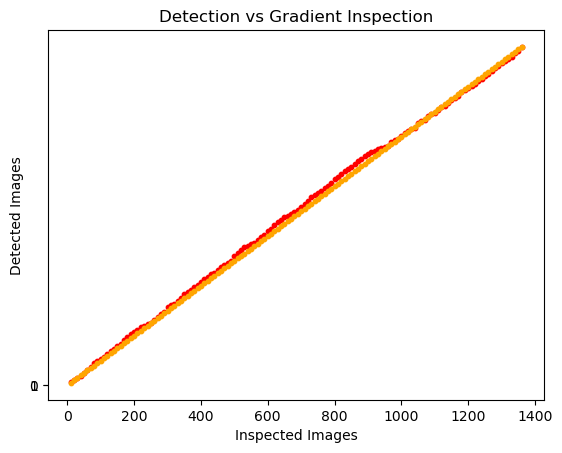

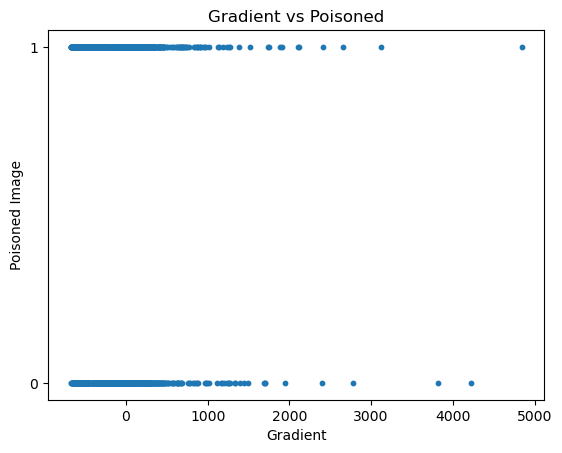

Number of poisoned images:  668  out of 10000.
last index of poison 1367


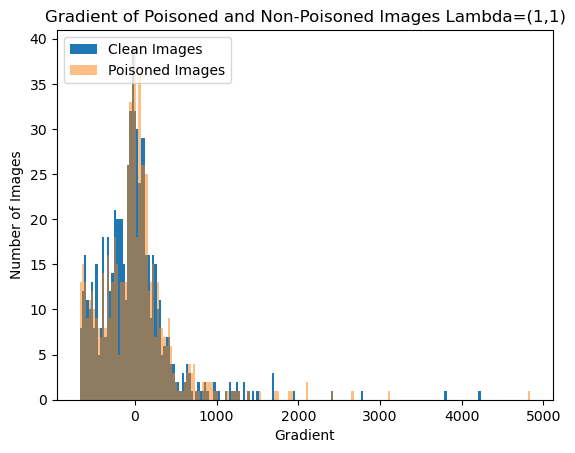

In [98]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag1, training_size, portion, poisoned=668)

inspected: 10, found: 1 actual found: 1 sythetic found; 0, detection rate: 0.00 baseline: 1.8
inspected: 20, found: 5 actual found: 5 sythetic found; 0, detection rate: 0.02 baseline: 3.6
inspected: 30, found: 7 actual found: 7 sythetic found; 0, detection rate: 0.02 baseline: 5.4
inspected: 40, found: 8 actual found: 8 sythetic found; 0, detection rate: 0.03 baseline: 7.2
inspected: 50, found: 10 actual found: 10 sythetic found; 0, detection rate: 0.03 baseline: 9.0
inspected: 60, found: 13 actual found: 13 sythetic found; 0, detection rate: 0.04 baseline: 10.8
inspected: 70, found: 14 actual found: 14 sythetic found; 0, detection rate: 0.05 baseline: 12.6
inspected: 80, found: 15 actual found: 15 sythetic found; 0, detection rate: 0.05 baseline: 14.4
inspected: 90, found: 16 actual found: 16 sythetic found; 0, detection rate: 0.05 baseline: 16.2
inspected: 100, found: 16 actual found: 16 sythetic found; 0, detection rate: 0.05 baseline: 18.0
inspected: 110, found: 20 actual found: 20

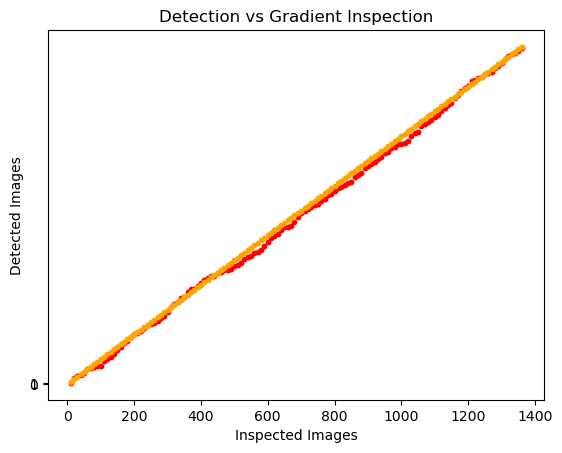

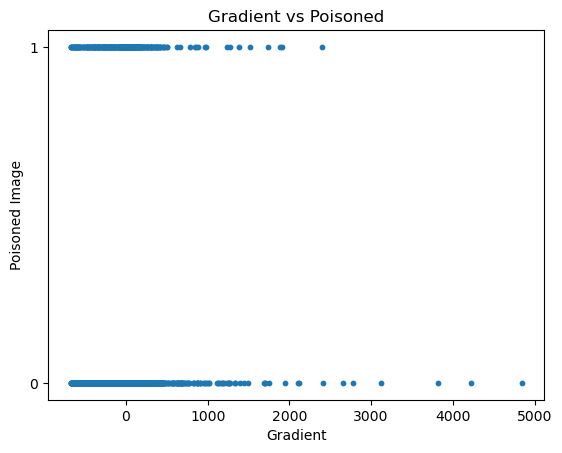

Number of poisoned images:  300  out of 10000.
last index of poison 1367


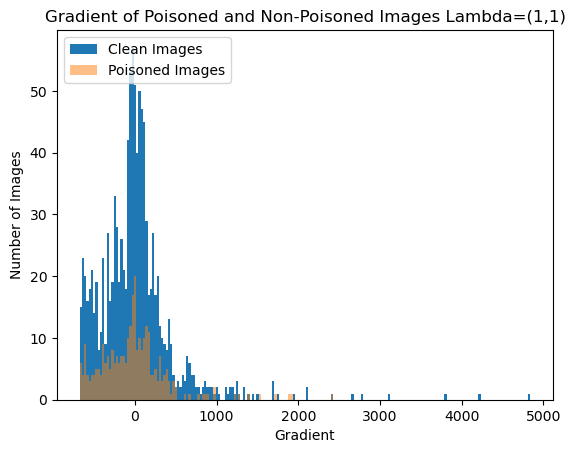

In [112]:
%matplotlib inline
calibrated_gradient = lava.compute_values_and_visualize(dual_sol, trained_with_flag1, training_size, portion, poisoned=300)

## mean, cov

In [ ]:
DA = (X1, Y1)
DB = (X2, Y2)
XA = augmented_dataset(DA, self.Means[0], self.Covs[0], maxn=maxsamples)
XB = augmented_dataset(DB, self.Means[1], self.Covs[1], maxn=maxsamples)